---
# <center> Лабораторна робота №3 </center>
## __Тема. Аналіз складності алгоритмів. Алгоритми сортування__
## __Мета:__ освоїти аналіз складності алгоритмів як технологію на прикладі алгоритмів сортування методами включення та обміну.
---

## <center> Хід роботи </center>

### 3. Виконуємо теоретичні розрахунки асимптотичної складності алгоритмів сортування методами вставляння та бульбашки

**Сортування методом вставляння:**

- Гірший випадок (кожен елемент вставляється на початок вже відсортованого масиву, що потребує порівнянь з усіма попередніми елементами):

Для кожного елемента 𝑖 у масиві з 𝑛 елементів потрібно виконати 𝑖 операцій.

Сумарна кількість операцій: $$\sum_{i=1}^{n-1} i = \frac{(n-1)n}{2}$$
Тобто $𝑂(𝑛^2)$

- Середній випадок (кожен елемент вставляється в середину відсортованої частини масиву):


Кількість операйцій : $$\frac{n}{2} \times (n - 1) \sim O(n^2)$$

- Найкращий випадок (масив вже відсортований, тому кожен елемент залишається на своєму місці без перестановок):

Кількість операцій: 𝑛−1, тобто 𝑂(𝑛)

**Сортування методом бульбашки:**

- Гірший випадок (масив відсортований у зворотному порядку, тому всі елементи потрібно переставити):

Для кожного проходу по масиву виконується 𝑛 − 1, 𝑛 − 2, ..., 1 порівнянь:
$$\sum_{i=1}^{n-1} i = \frac{(n-1)n}{2}$$
Тобто $𝑂(𝑛^2)$

- Середній випадок (кожен елемент порівнюється і переміщується приблизно половину разів):


Середня кількість операцій: $O(n^2)$.

- Найкращий випадок (масив вже відсортований, і метод бульбашки завершується після одного проходу без обмінів):

Потрібно 𝑂(𝑛) порівнянь.

### 4. Реалізовуємо на Python алгоритм сортування методом бульбашки

In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
if __name__ == "__main__":
    array = [64, 34, 25, 12, 22, 11, 90]
    print("Не відсортований масив:", array)
    bubble_sort(array)
    print("Відсортований масив:", array)

Не відсортований масив: [64, 34, 25, 12, 22, 11, 90]
Відсортований масив: [11, 12, 22, 25, 34, 64, 90]


### 5. Досліджуємо реальний час виконання обох алгоритмів на Python і будуємо графіки залежностей $T_{insert}(n)$ та $T_{buble}(n)$ для n = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000, 100000], згенерувавши відповідні цілочисельні масиви.

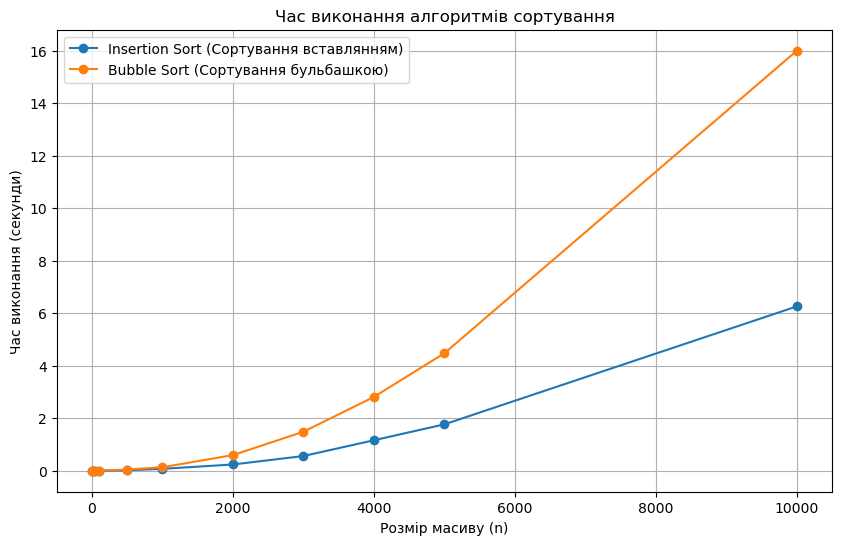

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr.copy())  # Копіюємо масив, щоб не змінювати оригінал
    end_time = time.time()
    return end_time - start_time

n_values = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000]
t_insertion = []
t_bubble = []

for n in n_values:
    test_array = np.random.randint(0, 10000, n)  # Генерація випадкового цілочисельного масиву
    t_insertion.append(measure_time(insertion_sort, test_array))
    t_bubble.append(measure_time(bubble_sort, test_array))

plt.figure(figsize=(10, 6))
plt.plot(n_values, t_insertion, label="Insertion Sort (Сортування вставлянням)", marker='o')
plt.plot(n_values, t_bubble, label="Bubble Sort (Сортування бульбашкою)", marker='o')
plt.xlabel("Розмір масиву (n)")
plt.ylabel("Час виконання (секунди)")
plt.title("Час виконання алгоритмів сортування")
plt.legend()
plt.grid(True)
plt.show()


## <center> Контрольні питання </center>

### 1. Що таке O-нотація і чим вона відрізняється від Ω -нотації?
O-нотація (Big-O) описує верхню межу швидкості росту алгоритму, показуючи найгірший випадок його роботи, тоді як Ω-нотація (Big-Omega) визначає нижню межу, характеризуючи найкращий можливий сценарій. Вони використовуються для аналізу асимптотичної складності алгоритмів.

### 2. Яку часову складність має алгоритм сортування методом вставляння за найсприятливіших умов, коли масив відсортовано? Відповідь обґрунтувати.
За найсприятливіших умов, коли масив вже відсортований, алгоритм сортування методом вставляння має часову складність O(n), оскільки кожен елемент лише порівнюється з попереднім, і жодних перестановок не відбувається.

### 3. Надати визначення ефективного алгоритму.
Ефективний алгоритм — це алгоритм, який виконує поставлену задачу за розумний час і з використанням оптимального обсягу ресурсів, таких як пам'ять та обчислювальна потужність, забезпечуючи прийнятну продуктивність для розв'язання практичних завдань.

### 4. Пояснити поняття головного параметра (розміру) завдання.
Головний параметр (розмір) завдання — це характеристика, яка кількісно визначає обсяг вхідних даних для задачі та впливає на складність алгоритму. Наприклад, для сортування це кількість елементів у масиві, а для обробки тексту — кількість символів у рядку.

### 5. Функція часової складності має вигляд: F(N) = N 3 + 7N 2 − 14N. Як записати асимптотичну складність у O-нотації?
Асимптотичну складність у O-нотації для функції $𝐹(𝑁) = 𝑁^3 + 7𝑁^2 − 14𝑁$ записують як $𝑂(𝑁^3)$. Це тому, що $𝑁^3$ є домінуючим членом у функції при великих 𝑁, а менш значущі члени відкидаються.